# Capstone Project 1-In-Depth Analysis

## 1.  Import modules and datasets

### 1.1 Import relevant modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Import dataset

In [3]:
df=pd.read_csv('blackfriday_clean.csv',index_col=0)
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase,product_category_num
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,1


### 1.3 Preprocess dataset for purchase level prediction 

In [4]:
df_pa=df.pivot_table(values='purchase',index=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status'],aggfunc=np.sum)
df_pa=df_pa.reset_index()
df_pa.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,purchase
0,1000001,F,0-17,10,A,2,0,333481
1,1000002,M,55+,16,C,4+,0,810353
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,205987
4,1000005,M,26-35,20,A,1,1,821001


In order to conduct the Chi-square test of independence between purchase levels and different parameters, total purchase amounts are categorized into different categories. In this case, categories are chosen based on every 10000 interval of purchase amounts, 0, 1, 2, 3, 4 correspond to purchase amounts of 0-1,000,000, 1,000,000-2,000,000, 2,000,000-3,000,000, 3,000,000-4,000,000, above 4,000,000, respectively.

0    4270
1    1008
2     375
3     139
4      99
Name: purchase level, dtype: int64


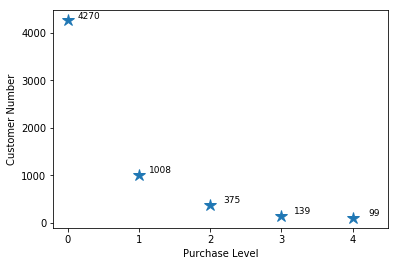

In [5]:
df_pa['purchase level']=[v//1000000 if v<4000000 else 4 for v in df_pa['purchase']]
print(df_pa['purchase level'].value_counts())
df_pa_count=df_pa['purchase level'].value_counts()
_=plt.plot(df_pa_count.index,df_pa_count.values,marker='*',markersize=12,linestyle='none')
_=plt.xticks(df_pa_count.index)
_=plt.xlim(right=4.5)
_=plt.xlabel('Purchase Level')
_=plt.ylabel('Customer Number')
for a,b in zip(df_pa_count.index,df_pa_count.values):
    _=plt.text(a+0.3, b, '%d' % b, ha='center', va= 'bottom',fontsize=9)

In [6]:
df_pa.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,purchase,purchase level
0,1000001,F,0-17,10,A,2,0,333481,0
1,1000002,M,55+,16,C,4+,0,810353,0
2,1000003,M,26-35,15,A,3,0,341635,0
3,1000004,M,46-50,7,B,2,1,205987,0
4,1000005,M,26-35,20,A,1,1,821001,0


In [7]:
df_pa=df_pa.drop(['purchase'],axis=1)
df_pa.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,purchase level
0,1000001,F,0-17,10,A,2,0,0
1,1000002,M,55+,16,C,4+,0,0
2,1000003,M,26-35,15,A,3,0,0
3,1000004,M,46-50,7,B,2,1,0
4,1000005,M,26-35,20,A,1,1,0


### 1.4 Preprocess dataset for product category prediction

8     2024
1     2002
5      938
15     243
16     205
2      111
14      93
11      66
6       44
4       43
10      37
3       24
17      19
13      12
9        8
7        7
12       6
18       2
Name: product_category, dtype: int64


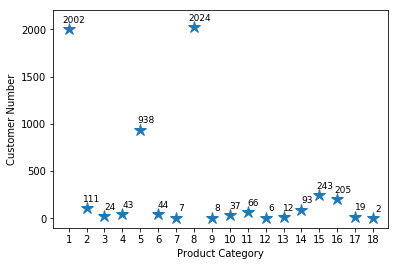

In [8]:
df_pc1=pd.melt(df,id_vars=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','purchase'],value_vars=['product_category_1','product_category_2','product_category_3'])
df_pc1=df_pc1.pivot_table(values='purchase',index=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','value'],aggfunc=np.sum)
df_pc1=df_pc1.reset_index()
df_pc1=df_pc1[(df_pc1.value!=0)]
df_pc2=df_pc1.pivot_table(values='purchase',index=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status'],aggfunc=np.max)
df_pc2=df_pc2.reset_index()
df_pc2.columns=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','max_purchase']
df_pc1.columns=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','product_category','purchase']
df_pc=pd.merge(df_pc1,df_pc2,on=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status'])
df_pc=df_pc[df_pc.purchase==df_pc.max_purchase]
df_pc['user_id'].value_counts()
df_pc=df_pc[(df_pc.user_id!=1004553) & (df_pc.user_id!=1004597) & (df_pc.user_id!=1000250) & (df_pc.user_id!=1005383) & (df_pc.user_id!=1005904) & (df_pc.user_id!=1000041) & (df_pc.user_id!=1005320)]
print(df_pc['product_category'].value_counts())
df_pc_count=df_pc['product_category'].value_counts()
_=plt.plot(df_pc_count.index,df_pc_count.values,marker='*',markersize=12,linestyle='none')
_=plt.xticks(df_pc_count.index)
_=plt.ylim(top=2200)
_=plt.xlabel('Product Category')
_=plt.ylabel('Customer Number')
for a,b in zip(df_pc_count.index,df_pc_count.values):
    _=plt.text(a+0.3, b+50, '%d' % b, ha='center', va= 'bottom',fontsize=9)

In [9]:
df_pc=df_pc.drop(['purchase','max_purchase'],axis=1)
df_pc.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category
3,1000001,F,0-17,10,A,2,0,4
17,1000002,M,55+,16,C,4+,0,8
27,1000003,M,26-35,15,A,3,0,1
38,1000004,M,46-50,7,B,2,1,1
55,1000005,M,26-35,20,A,1,1,8


### 1.5 Change categorical values into numerical values

In [10]:
df_pa['gender1']=[0 if v=='F' else 1 for v in df_pa['gender']]

age1=[]
for row in df_pa['age']:
    if row=='0-17':
        age1.append(0)
    elif row=='18-25':
        age1.append(1)
    elif row=='26-35':
        age1.append(2)
    elif row=='36-45':
        age1.append(3)
    elif row=='46-50':
        age1.append(4)
    elif row=='51-55':
        age1.append(5)
    elif row=='55+':
        age1.append(6)
df_pa['age1']=age1

city1=[]
for row in df_pa['city_category']:
    if row=='A':
        city1.append(0)
    if row=='B':
        city1.append(1)
    if row=='C':
        city1.append(2)
df_pa['city1']=city1

df_pa['stay_in_current_city_years1']=[4 if v=='4+' else v for v in df_pa['stay_in_current_city_years']]
df_pa=df_pa.drop(['gender','age','city_category','stay_in_current_city_years'],axis=1)
df_pa.columns=['user_id','occupation','marital_status','purchase_level','gender','age','city','years']
df_pa.head()

,user_id,occupation,marital_status,purchase_level,gender,age,city,years
0,1000001,10,0,0,0,0,0,2
1,1000002,16,0,0,1,6,2,4
2,1000003,15,0,0,1,2,0,3
3,1000004,7,1,0,1,4,1,2
4,1000005,20,1,0,1,2,0,1


In [11]:
df_pc['gender1']=[0 if v=='F' else 1 for v in df_pc['gender']]

age1=[]
for row in df_pc['age']:
    if row=='0-17':
        age1.append(0)
    elif row=='18-25':
        age1.append(1)
    elif row=='26-35':
        age1.append(2)
    elif row=='36-45':
        age1.append(3)
    elif row=='46-50':
        age1.append(4)
    elif row=='51-55':
        age1.append(5)
    elif row=='55+':
        age1.append(6)
df_pc['age1']=age1

city1=[]
for row in df_pc['city_category']:
    if row=='A':
        city1.append(0)
    if row=='B':
        city1.append(1)
    if row=='C':
        city1.append(2)
df_pc['city1']=city1

df_pc['stay_in_current_city_years1']=[4 if v=='4+' else v for v in df_pc['stay_in_current_city_years']]
df_pc=df_pc.drop(['gender','age','city_category','stay_in_current_city_years'],axis=1)
df_pc.columns=['user_id','occupation','marital_status','product_category','gender','age','city','years']
df_pc['years']=df_pc['years'].astype(int)
df_pc.head()

,user_id,occupation,marital_status,product_category,gender,age,city,years
3,1000001,10,0,4,0,0,0,2
17,1000002,16,0,8,1,6,2,4
27,1000003,15,0,1,1,2,0,3
38,1000004,7,1,1,1,4,1,2
55,1000005,20,1,8,1,2,0,1


## 2. In-depth analysis on prediction of product category

### 2.1 Using K-Nearest Neighbors

In [12]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X=df_pc.drop(['user_id','product_category'],axis=1).values
y=df_pc['product_category'].values

In [14]:
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 31}
0.3899745114698386
[[258   0   0   0   4   0   0 120   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   1   0   0  12   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   2   0   0   3   0   0   0   0   0   0   0   0   0]
 [126   0   0   0   8   0   0  75   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [187   0   0   0   6   0   0 193   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   1   0   0   3   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0  10   0 

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.2 Using SVM

#### 2.2.1 Using simple SVM

In [15]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
print(svclassifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.3976210705182668
[[333   0   0   0   0   0   0  49   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0  57   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [251   0   0   0   0   0   0 135   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0  12   0   0   0   0   0   0 

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 2.2.2 Using polynomial kernel

In [16]:
svclassifier=SVC(kernel='rbf')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
print(svclassifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.405267629566695
[[256   0   0   0   2   0   0 124   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   1   0   0  11   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   4   0   0   6   0   0   0   0   0   0   0   0   0]
 [117   0   0   0   3   0   0  89   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [165   0   0   0   3   0   0 218   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0  12   0   0   0   0   0   0  

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 2.2.3 Using sigmoid kernel

In [17]:
svclassifier=SVC(kernel='sigmoid')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
print(svclassifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.2786745964316058
[[179   3   0   0   0   0   0 187   0   0   0   0   0   0   0  13   0]
 [ 12   1   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   8   0   0   0   0   0   0   0   0   0]
 [ 94   1   0   0   0   0   0 100   0   0   0   0   0   0   0  14   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [214   7   0   0   2   0   0 148   0   0   0   0   0   0   0  15   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   5   0   0   0   0   0   0   0   1   0]
 [  7   0   0   0   0   0   0   8   0   0   0   0   0   0   0   1   0]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   6   0   0   0   0   0   0 

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 3. In-depth analysis on prediction of purchase level

### 3.1 Using K-Nearest Neighbors

In [18]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
X=df_pa.drop(['user_id','purchase_level'],axis=1).values
y=df_pa['purchase_level'].values

In [21]:
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(knn_cv.best_params_)

0.73960983884648
[[872   2   0   0   0]
 [196   0   0   0   0]
 [ 71   0   0   0   0]
 [ 21   1   0   0   0]
 [ 16   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       874
          1       0.00      0.00      0.00       196
          2       0.00      0.00      0.00        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.55      0.74      0.63      1179

{'n_neighbors': 40}


C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.2 Using SVM

#### 3.2.1 Using simple SVM

In [22]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
print(svclassifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.741306191687871
[[874   0   0   0   0]
 [196   0   0   0   0]
 [ 71   0   0   0   0]
 [ 22   0   0   0   0]
 [ 16   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       874
          1       0.00      0.00      0.00       196
          2       0.00      0.00      0.00        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.55      0.74      0.63      1179



C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 3.2.2 Using polynomial kernel

In [23]:
svclassifier=SVC(kernel='rbf')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
print(svclassifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.741306191687871
[[874   0   0   0   0]
 [196   0   0   0   0]
 [ 71   0   0   0   0]
 [ 22   0   0   0   0]
 [ 16   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       874
          1       0.00      0.00      0.00       196
          2       0.00      0.00      0.00        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.55      0.74      0.63      1179



C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 3.2.3 Using sigmoid kernel

In [24]:
svclassifier=SVC(kernel='sigmoid')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
print(svclassifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6870229007633588
[[796   6  53   0  19]
 [182   2  10   0   2]
 [ 59   0  12   0   0]
 [ 19   0   3   0   0]
 [  9   1   6   0   0]]
             precision    recall  f1-score   support

          0       0.75      0.91      0.82       874
          1       0.22      0.01      0.02       196
          2       0.14      0.17      0.15        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.60      0.69      0.62      1179



C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
